# Análisis Exploratorio de Datos
## Dataset: FIFA

In [1]:
# Importando todas las librerías requeridas para el análisis

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats

In [2]:
# Cargando el archivo commo dataframe
df_fifa = pd.read_csv("./data/fifa_AE.csv")

In [3]:
# Mostrando las dimensiones del dataframe
df_fifa.shape

(17981, 7)

In [4]:
# Verificando los tipos de datos de las columnas
df_fifa.dtypes

Name                   object
Age                     int64
Nationality            object
Overall                 int64
Club                   object
Value                  object
Preferred Positions    object
dtype: object

In [5]:
# Imprimiendo los primeros 10 registros
df_fifa.head(10)

,Name,Age,Nationality,Overall,Club,Value,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,Real Madrid CF,€95.5M,ST
1,L. Messi,30,Argentina,93,FC Barcelona,€105M,RW
2,Neymar,25,Brazil,92,Paris Saint-Germain,€123M,LW
3,L. Suárez,30,Uruguay,92,FC Barcelona,€97M,ST
4,M. Neuer,31,Germany,92,FC Bayern Munich,€61M,GK
5,R. Lewandowski,28,Poland,91,FC Bayern Munich,€92M,ST
6,De Gea,26,Spain,90,Manchester United,€64.5M,GK
7,E. Hazard,26,Belgium,90,Chelsea,€90.5M,LW
8,T. Kroos,27,Germany,90,Real Madrid CF,€79M,CDM
9,G. Higuaín,29,Argentina,90,Juventus,€77M,ST


### Transformando al tipo de dato correcto la columna *Value*

In [6]:
# La columna "value" no es de tipo entero
# Verificando los diferentes caractéres que contiene esta columna

set_char = set()

def add_chars(x):
    for i in x:
        set_char.add(i)
    return True

df_fifa["Value"].apply(add_chars)
set_char

{'.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'K', 'M', '€'}

In [7]:
# Convirtiendo la columna a valor numérico

def get_value(x):
    x = x.replace('€','')
    if 'M' in x:
        x = x.replace('M','')
        return float(x)*1000000
    elif 'K' in x:
        x = x.replace('K','')
        return float(x)*1000
    else:
        return float(x)

df_fifa["Value"] = df_fifa["Value"].apply(get_value)

### Análisis cuantitativo sobre la columna *Value*

In [8]:
# Calculando el promedio del valor de los jugadores
mean = np.mean(df_fifa["Value"])
mean

2385389.5778877703

In [9]:
# Calculando la mediana del valor de los jugadores
median = np.median(df_fifa["Value"])
median

675000.0

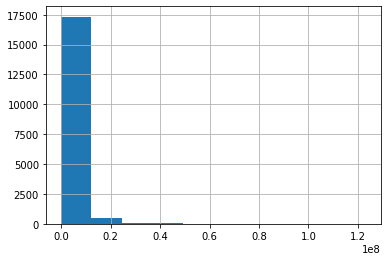

In [10]:
# Pintando el histograma del valor de los jugadores
df_fifa["Value"].hist()

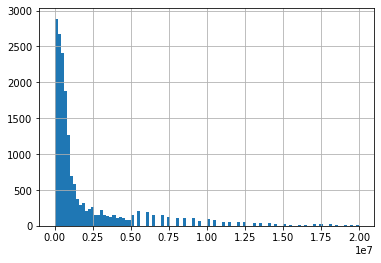

In [11]:
# Dado que no se logra una buena visualización, se pinta nuevamente modificando la cantidad de bins (grupos) y el rango del eje x
df_fifa["Value"].hist(bins = 100, range = [0, 20000000])

In [12]:
# Calculando la varianza del valor de los jugadores
variance = np.var(df_fifa["Value"])
variance

28663400261162.418

In [13]:
# Dado que las unidades de la varianza son más dificiles de interpretar, se calcula la desviación estándar del valor de los jugadores
std_deviation = np.std(df_fifa["Value"])
std_deviation

5353821.089760323

In [14]:
# Calculando los diferentes quartiles del valor de los jugadores
q1 = np.percentile(df_fifa["Value"], 25)
print("El 25% de los jugadores con los salarios más bajos ganan a lo sumo {}".format(q1))

q2 = np.percentile(df_fifa["Value"], 50)
print("El siguiente 25% de los jugadores con los salarios más bajos ganan entre {} y {}".format(q1, q2))

q3 = np.percentile(df_fifa["Value"], 75)
print("El 25% de los jugadores con los salarios más altos ganan más de {}".format(q3))

El 25% de los jugadores con los salarios más bajos ganan a lo sumo 300000.0
El siguiente 25% de los jugadores con los salarios más bajos ganan entre 300000.0 y 675000.0
El 25% de los jugadores con los salarios más altos ganan más de 2100000.0


In [15]:
# Calculando la curtosis de la distribución del valor de los jugadores
kurtosis = scipy.stats.kurtosis(df_fifa["Value"])
kurtosis

81.52897382468426

In [16]:
# Calculando la asimetría de la distribución del valor de los jugadores
asymmetry = scipy.stats.skew(df_fifa["Value"])
asymmetry

7.074886165642367

In [17]:
# Calculando el valor del jugador más barato
minimum = np.min(df_fifa["Value"])
minimum

0.0

In [18]:
# ¿Quién o quiénes son los jugadores con el valor más bajo?
df_fifa.loc[df_fifa["Value"] == minimum]

,Name,Age,Nationality,Overall,Club,Value,Preferred Positions
162,Oscar,25,Brazil,83,NaN,0.0,CAM
167,Adrien Silva,28,Portugal,83,NaN,0.0,CDM
274,A. Witsel,28,Belgium,82,NaN,0.0,CAM
472,M. Berg,30,Sweden,80,NaN,0.0,CF
488,Renato Augusto,29,Brazil,80,NaN,0.0,LM
...,...,...,...,...,...,...,...
17492,S. Passi,22,India,52,NaN,0.0,ST
17553,S. Brotherton,20,New Zealand,52,NaN,0.0,CB
17605,A. Al Basisi,39,Saudi Arabia,52,Ohod Club,0.0,GK
17617,P. Jennings,37,England,52,St. Patrick's Athletic,0.0,GK


In [19]:
# Calculando el valor del jugador más caro
maximum = np.max(df_fifa["Value"])
maximum

123000000.0

In [20]:
# ¿Quién es el jugador con el valor más alto?
df_fifa.loc[df_fifa["Value"] == maximum]

,Name,Age,Nationality,Overall,Club,Value,Preferred Positions
2,Neymar,25,Brazil,92,Paris Saint-Germain,123000000.0,LW


In [21]:
# Utilizando la función describe para el cálculo de las principales estadísticas de interés para una variable cuantitativa
df_fifa["Value"].describe()

count    1.798100e+04
mean     2.385390e+06
std      5.353970e+06
min      0.000000e+00
25%      3.000000e+05
50%      6.750000e+05
75%      2.100000e+06
max      1.230000e+08
Name: Value, dtype: float64

In [22]:
# Revisando los jugadores con valores atípicos
df_fifa[df_fifa["Value"] > (mean + std_deviation * 3)]

,Name,Age,Nationality,Overall,Club,Value,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,Real Madrid CF,95500000.0,ST
1,L. Messi,30,Argentina,93,FC Barcelona,105000000.0,RW
2,Neymar,25,Brazil,92,Paris Saint-Germain,123000000.0,LW
3,L. Suárez,30,Uruguay,92,FC Barcelona,97000000.0,ST
4,M. Neuer,31,Germany,92,FC Bayern Munich,61000000.0,GK
...,...,...,...,...,...,...,...
486,E. Lamela,25,Argentina,80,Tottenham Hotspur,18500000.0,LM
528,M. Dahoud,21,Germany,79,Borussia Dortmund,18500000.0,CDM
534,A. Correa,22,Argentina,79,Atlético Madrid,19000000.0,RW
537,W. Cyprien,22,France,79,OGC Nice,18500000.0,CDM


In [23]:
# Revisando los jugadores con un valores extremos
df_fifa[df_fifa["Value"] > (mean + std_deviation * 15)]

,Name,Age,Nationality,Overall,Club,Value,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,Real Madrid CF,95500000.0,ST
1,L. Messi,30,Argentina,93,FC Barcelona,105000000.0,RW
2,Neymar,25,Brazil,92,Paris Saint-Germain,123000000.0,LW
3,L. Suárez,30,Uruguay,92,FC Barcelona,97000000.0,ST
5,R. Lewandowski,28,Poland,91,FC Bayern Munich,92000000.0,ST
7,E. Hazard,26,Belgium,90,Chelsea,90500000.0,LW
11,K. De Bruyne,26,Belgium,89,Manchester City,83000000.0,RM


### Análisis cualitativo sobre la columna *Preferred Positions*

In [24]:
# Calculando la frecuencia de las diferentes posiciones de los jugadores
abs_frecuency = df_fifa["Preferred Positions"].value_counts().to_frame()
abs_frecuency

,Preferred Positions
CB,2705
ST,2277
GK,2029
CM,1977
CDM,1396
RM,1350
LM,1326
LB,1309
RB,1195
CAM,1125


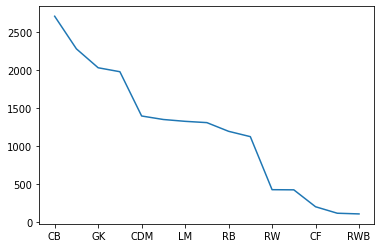

In [25]:
# Pintando la misma frecuencia de las posiciones
# Sin embargo un gráfico de línea no es tl tipo de gráfico correcto ya que implica una continuidad entre las posiciones las cuales son inherentemente categóricas nominales
df_fifa["Preferred Positions"].value_counts().plot()

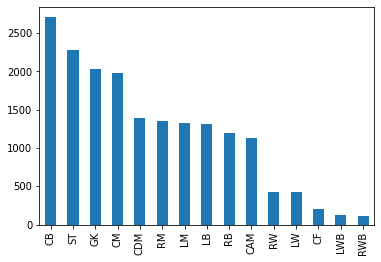

In [26]:
# Pintando de nuevo la frecuencia de las posiciones utilizando un gráfico de barras como una mejor alternativa de visualización
df_fifa["Preferred Positions"].value_counts().plot(kind = "bar")

In [27]:
# Complementando la tabla de frecuencias agregando la frecuencia relativa de cada posición
rel_frecuency = df_fifa["Preferred Positions"].value_counts(normalize = True).to_frame()
pd.concat([abs_frecuency, rel_frecuency], axis = 1)

,Preferred Positions,Preferred Positions
CB,2705,0.150437
ST,2277,0.126634
GK,2029,0.112841
CM,1977,0.109949
CDM,1396,0.077638
RM,1350,0.075079
LM,1326,0.073745
LB,1309,0.072799
RB,1195,0.066459
CAM,1125,0.062566


### Análisis bivariado sobre las columnas *Value* y *Age*

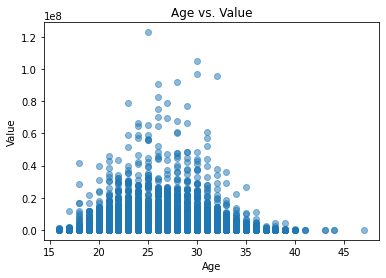

In [28]:
# Graficando la relación entre la edad y el valor del jugador
plt.scatter(df_fifa["Age"], df_fifa["Value"],alpha = 0.5)
plt.title("Age vs. Value")
plt.xlabel("Age")
plt.ylabel("Value")
plt.show()

In [29]:
# Calculando la correlación (lineal) entre las dos variables
df_fifa[["Age", "Value"]].corr()

,Age,Value
Age,1.000000,0.079309
Value,0.079309,1.000000


In [30]:
# Calculando la correlación (monótona) entre las dos variables
df_fifa[["Age", "Value"]].corr("spearman")

,Age,Value
Age,1.000000,0.227658
Value,0.227658,1.000000


### Análisis bivariado sobre las columnas *Value* y *Overall*

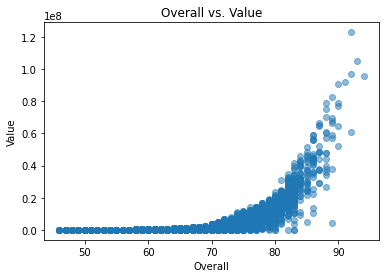

In [31]:
# Graficando la relación entre la edad y el valor del jugador
plt.scatter(df_fifa["Overall"], df_fifa["Value"],alpha = 0.5)
plt.title("Overall vs. Value")
plt.xlabel("Overall")
plt.ylabel("Value")
plt.show()

In [32]:
# Calculando la correlación (lineal) entre las dos variables
df_fifa[["Overall", "Value"]].corr()

,Overall,Value
Overall,1.000000,0.626001
Value,0.626001,1.000000


In [33]:
# Calculando la correlación (monótona) entre las dos variables
df_fifa[["Overall", "Value"]].corr("spearman")

,Overall,Value
Overall,1.000000,0.912146
Value,0.912146,1.000000


### Análisis multivariado, comparación entre categorías

In [34]:
# Filtrando los jugadores del Real Madrid
df_real_madrid = df_fifa.loc[df_fifa["Club"] == "Real Madrid CF"]
df_real_madrid.head()

,Name,Age,Nationality,Overall,Club,Value,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,Real Madrid CF,95500000.0,ST
8,T. Kroos,27,Germany,90,Real Madrid CF,79000000.0,CDM
10,Sergio Ramos,31,Spain,90,Real Madrid CF,52000000.0,CB
14,L. Modrić,31,Croatia,89,Real Madrid CF,57000000.0,CDM
15,G. Bale,27,Wales,89,Real Madrid CF,69500000.0,RW


In [35]:
# Filtrando los jugadores de Santa Fe
df_santa_fe = df_fifa.loc[df_fifa["Club"] == "Independiente Santa Fe"]
df_santa_fe.head()

,Name,Age,Nationality,Overall,Club,Value,Preferred Positions
1860,W. Tesillo,27,Colombia,75,Independiente Santa Fe,6500000.0,CB
2399,A. Plata,26,Colombia,74,Independiente Santa Fe,7000000.0,ST
3087,L. Castellanos,33,Colombia,73,Independiente Santa Fe,2000000.0,GK
3424,D. Buitrago,26,Colombia,72,Independiente Santa Fe,3900000.0,CAM
3437,O. Pérez,36,Argentina,72,Independiente Santa Fe,1000000.0,CAM


In [36]:
# Filtrando los jugadores de Millonarios
df_millonarios = df_fifa.loc[df_fifa["Club"] == "CD Los Millionarios Bogota"]
df_millonarios.head()

,Name,Age,Nationality,Overall,Club,Value,Preferred Positions
2165,N. Vikonis,33,Uruguay,74,CD Los Millionarios Bogota,2800000.0,GK
2909,D. Silva,30,Colombia,73,CD Los Millionarios Bogota,3700000.0,CDM
3137,A. del Valle,28,Colombia,73,CD Los Millionarios Bogota,4100000.0,ST
3412,D. Riascos,31,Colombia,72,CD Los Millionarios Bogota,2800000.0,RW
3510,A. Cadavid,31,Colombia,72,CD Los Millionarios Bogota,2100000.0,CB


In [37]:
# Comparando las edades entre diferentes clubes
pd.concat([
    df_real_madrid["Age"].describe().to_frame().rename(columns = {"Age": "Real Madrid"}),
    df_santa_fe["Age"].describe().to_frame().rename(columns = {"Age": "Santa Fe"}),
    df_millonarios["Age"].describe().to_frame().rename(columns = {"Age": "Millonarios"})
], axis = 1)

,Real Madrid,Santa Fe,Millonarios
count,26.000000,28.000000,28.000000
mean,24.576923,27.214286,25.607143
std,4.464734,4.629672,4.848362
min,18.000000,19.000000,17.000000
25%,20.000000,24.000000,21.000000
50%,25.000000,26.500000,27.500000
75%,28.500000,30.250000,29.250000
max,32.000000,38.000000,33.000000


In [38]:
# Comparando el overall entre diferentes clubes
pd.concat([
    df_real_madrid["Overall"].describe().to_frame().rename(columns = {"Overall": "Real Madrid"}),
    df_santa_fe["Overall"].describe().to_frame().rename(columns = {"Overall": "Santa Fe"}),
    df_millonarios["Overall"].describe().to_frame().rename(columns = {"Overall": "Millonarios"})
], axis = 1)

,Real Madrid,Santa Fe,Millonarios
count,26.000000,28.000000,28.000000
mean,81.038462,69.428571,66.107143
std,7.886600,3.011442,5.645971
min,64.000000,61.000000,53.000000
25%,77.000000,68.000000,64.250000
50%,83.000000,69.000000,67.000000
75%,86.000000,72.000000,69.500000
max,94.000000,75.000000,74.000000


In [39]:
# Comparando los valores de jugadores entre diferentes clubes
pd.concat([
    df_real_madrid["Value"].describe().to_frame().rename(columns = {"Value": "Real Madrid"}),
    df_santa_fe["Value"].describe().to_frame().rename(columns = {"Value": "Santa Fe"}),
    df_millonarios["Value"].describe().to_frame().rename(columns = {"Value": "Millonarios"})
], axis = 1)

,Real Madrid,Santa Fe,Millonarios
count,2.600000e+01,2.800000e+01,2.800000e+01
mean,3.179615e+07,1.982679e+06,1.220893e+06
std,2.591294e+07,1.796272e+06,1.115543e+06
min,5.000000e+05,7.000000e+04,1.000000e+05
25%,1.000000e+07,8.875000e+05,4.125000e+05
50%,2.800000e+07,1.150000e+06,8.750000e+05
75%,4.637500e+07,2.700000e+06,1.725000e+06
max,9.550000e+07,7.000000e+06,4.100000e+06


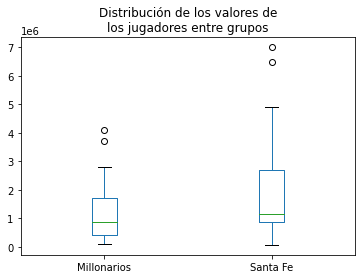

In [40]:
# Graficando la distribución de valores de jugadores de los clubes colombianos
df_box = pd.DataFrame({"Millonarios": df_millonarios["Value"], "Santa Fe": df_santa_fe["Value"]})
df_box.plot.box(title = "Distribución de los valores de\nlos jugadores entre grupos")

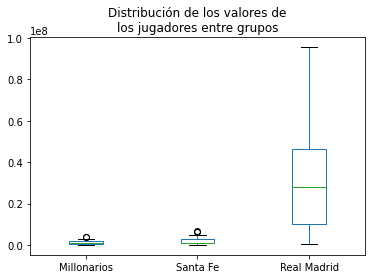

In [41]:
# Graficando la distribución de valores de jugadores de los clubes colombianos en comparación con el Real Madrid
df_box = pd.DataFrame({"Millonarios": df_millonarios["Value"], "Santa Fe": df_santa_fe["Value"], "Real Madrid": df_real_madrid["Value"]})
df_box.plot.box(title = "Distribución de los valores de\nlos jugadores entre grupos")